In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#SKLearn library and its functions
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [111]:
#Open the Dataframe
df = pd.read_csv('breast-cancer.csv')
df = df.drop(['id'], axis=1)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [112]:
#Filter out the data so the amount of samples of M and B are the same(creating blaance)
n = 357-212 

filter_B = df[df['diagnosis']=='B']
filter_B = filter_B.drop(filter_B.sample(n).index).reset_index(drop=True)

filter_M = df[df['diagnosis']=='M']

df = pd.concat([filter_M, filter_B])


df['diagnosis'].value_counts()

diagnosis
M    212
B    212
Name: count, dtype: int64

In [131]:
# Drop the column that is the one you are trying to predict

class_col = df.columns[0]

X, y = df.drop(columns=[class_col]), df[class_col]




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
#Split the data with 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [115]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [116]:
#Perform the logisitic regression
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

models = []

for i in solver:
    log_reg = LogisticRegression(solver=i)
    log_reg.fit(X_train,y_train)
    
    models.append(log_reg)

c:\Users\Huseyn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Huseyn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [117]:
#Confusion Matrix and the Classification reports for all the models
for ind, model in enumerate(models):
    y_pred = model.predict(X_test)

    print(f'Confusion matrix for the model: {solver[ind]}')
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)

    print(f'Classification report for the model: {solver[ind]}')
    report = classification_report(y_test, y_pred, target_names=['benign', 'malignant'])
    print(report)



Confusion matrix for the model: newton-cg
[[57  1]
 [ 3 67]]
Classification report for the model: newton-cg
              precision    recall  f1-score   support

      benign       0.95      0.98      0.97        58
   malignant       0.99      0.96      0.97        70

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128

Confusion matrix for the model: lbfgs
[[57  1]
 [ 3 67]]
Classification report for the model: lbfgs
              precision    recall  f1-score   support

      benign       0.95      0.98      0.97        58
   malignant       0.99      0.96      0.97        70

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128

Confusion matrix for the model: liblinear
[[57  1]
 [ 3 67]]
Classification report for the model: liblinear
              precision    rec

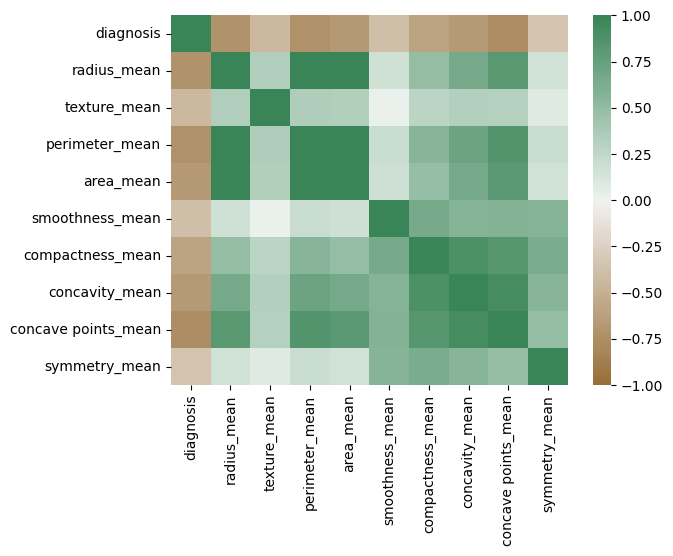

In [118]:
# Plotting the Heatmap
df_rep = df.replace(to_replace = ['M','B'], value = [0,1])



corr_matrix = df_rep[df_rep.columns[:10]].corr()

axis_corr = sns.heatmap(
corr_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=False
)

plt.show()

In [134]:
#Feature importance
coef = models[0].coef_[0]



np.sort(coef)

feat_df = pd.DataFrame({'Feature Label': X.columns, 'Coefficient':coef})

feat_df = feat_df.sort_values(by='Coefficient', ascending=False)


feat_df.head()


,Feature Label,Coefficient
20,radius_worst,1.032316
10,radius_se,0.925270
21,texture_worst,0.923453
22,perimeter_worst,0.910174
24,smoothness_worst,0.854109


<Axes: title={'center': 'Feature Coefficients'}, xlabel='Feature Label'>

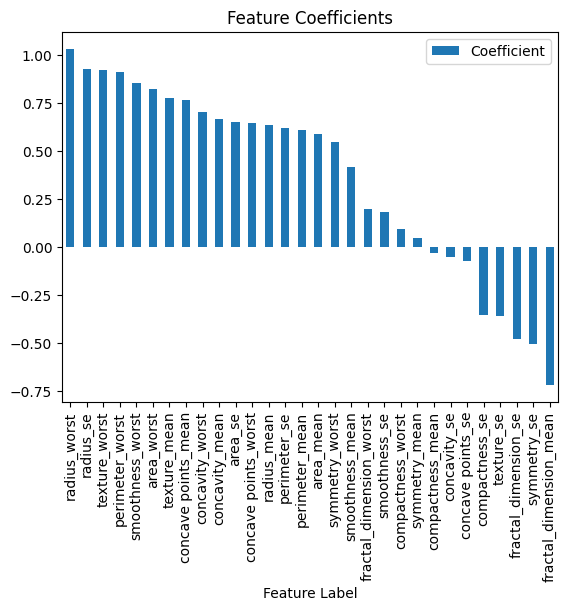

In [151]:
#Bar Graph for Visualization

feat_df.plot(kind='bar', x='Feature Label', y='Coefficient', title='Feature Coefficients')
